1.  Define your task: e.g. we are going to perturb our images such that our classification
 CNN says there are aeroplanes in it, while there are not; we are going to perturb our
 images such that our segmentation CNN will segment chairs in it, while there aren’t
 any.


 For our adversarial attack, we will perturb the InceptionResNet so it classifies each class as a different one. This will be achieved by creating class-specific perturbations that will be undetectable for the human eye, but will make the ResNet interpret the image as a completely different class, with high confidence. Such perturbations will be created through the Fast Gradient Sign Method (FGSM): *Thibault's part*



2. You can choose any loss function L that minimises the distance between the deceptive
 labels ydec (the ones you come up with) and the predicted label ˆ ydec. Since you don’t  want to retrain the original CNN, it is important to freeze its weights θc such that
 they do not change during the training phase of the adversary. Also, it is common to
 use a regularisation term R which represents the perturbation norm, e.g. l2 (euclidean
 distance) or l∞ (maximum norm), in order to come up with perturbations that are
 invisible for the naked eye.

As loss function for the adversary training, we used categorical cross-entropy loss. It is expressed as:

\[ L(y, \hat{y}) = -\sum_{i=1}^{C} y_i \log(\hat{y}_i) \]

In our case of adversary training we look to maximize this, since we want the difference between predicted class and true class to be as large as possible. We also used a l1 regularization term of 0.01 during training, which keeps perturbations small and keeps them invisible to the human eye.

 3. At least give some visual examples of what you are doing, e.g. the test image, the
 perturbation, the perturbed test image.

 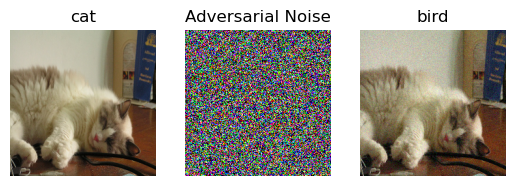

 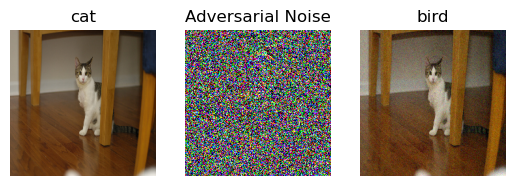

 4. Reflect on your setup/approach: Is this a realistic attack? Can it be used in a “real
 world” scenario? If so, how/when? Was the adversary successful? Are the images still
 recognisable for a human observer? Does this mean that your initial CNN hθc 
is now
 unreliable? What could we do to increase the robustness of a model under attack in
 general?


 Our adversarial model is one that can be applied in a "real word scenario". For example, it can be used in facial recognition tasks to fool security systems, or in autonomous vehicles to make them misinterpret traffic signs. 

 Our adversary was successful in fooling our CNN, however, slight grain is visibly detectable. 

 This does not mean our CNN as a whole is unreliable, since it does classify the majority of the images (without adversarial attack) correctly. It is however sensitive to adversarial attacks. This can be (partly) mitigated by including adversarial images in the training data, increasing the robustness of the model. Also, general regularization techniques such as early stopping and L2 regularization can be beneficial, since overfitted models tend to be easier to fool. 
 A third method is *defensive distillation* [1]: a technique used to increase the robustness of machine learning models, in particular against adversarial attacks. It involves training a 'teacher' model on the original dataset, and afterwards a 'student' model is trained on the same dataset, but now with soft labels created by the teacher (as opposed to the hard labels beforehand). These soft labels are probability distributions, and help the student model become more robust. Soft labels create smoother decision surfaces, which means small changes in the input data (e.g., adversarial perturbations) are less likely to have a drastic effect. It also makes the student understand the uncertainties of the predictions of the teacher, causing it to be less confident.











 references: 

 [1] Papernot, N., McDaniel, P., Wu, X., Jha, S., & Swami, A. (2016). Distillation as a Defense to Adversarial Perturbations against Deep Neural Networks. arXiv preprint arXiv:1511.04508.